In [142]:
# Import of all the libraries useful for this file
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

# Import of sys so that Python recognizes the folders as modules. Besides, we have created empty __init__.py files to use our files as modules too
import sys
sys.path.insert(0, "/home/apprenant/Documents/Brief-4-Rachid-Karbiche")

# Import of the objects of our py files
from src.d01_data.create_database import conn, cur

# Print of the current versions of our libraries
print('Matplotlib Version: ' + mpl.__version__)
print('NumPy Version: ' + np.version.full_version)
print('Python Version: ' + sys.version)
print('Seaborn Version: ' + sns.__version__)

Matplotlib Version: 3.3.2
NumPy Version: 1.19.2
Python Version: 3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
Seaborn Version: 0.11.0


## Fonction de formatage

In [143]:
# Function for formatting salary on "xK $"
def to_k_usd(x):
    return str(int((x / 1000))) + "K $"

## Affichage de la table Responses de notre base de données

Dans un premier temps, on récupère l'une de nos tables afin de pouvoir travailler avec

In [144]:
sql = """select * from Responses"""
survey_table = pd.read_sql_query(sql, conn)
print(survey_table)

      index  SalaryUSD        Country PostalCode  \
0         0   115000.0  United States         03   
1         1   100000.0  United States       None   
2         3    70000.0  United States      94133   
3         4   110000.0  United States      95354   
4         5    79500.0  United States      78727   
...     ...        ...            ...        ...   
5537   8605    78000.0  United States  Not Asked   
5538   8608   101750.0  United States  Not Asked   
5539   8609    66000.0  United States  Not Asked   
5540   8614   137500.0  United States  Not Asked   
5541   8626   200000.0  United States  Not Asked   

                                       EmploymentStatus  \
0                                    Full time employee   
1                                    Full time employee   
2                                    Full time employee   
3                                    Full time employee   
4                                    Full time employee   
...                  

## Table Responses : Salaire moyen, salaire médian et les dix déciles

In [145]:
avg_salary = survey_table["SalaryUSD"].mean()
med_salary = survey_table["SalaryUSD"].median()
print("-------------------------------")
print("Le salaire annuel moyen aux USA est de {} et le salaire médian est de {}".format(to_k_usd(avg_salary), to_k_usd(med_salary)))
print("-------------------------------")

deciles_salary = pd.qcut(survey_table['SalaryUSD'], q=10)
print(deciles_salary)

-------------------------------
Le salaire annuel moyen aux USA est de 108K $ et le salaire médian est de 103K $
-------------------------------
0        (110000.0, 120000.0]
1         (95000.0, 103000.0]
2          (67550.0, 80000.0]
3        (103000.0, 110000.0]
4          (67550.0, 80000.0]
                ...          
5537       (67550.0, 80000.0]
5538      (95000.0, 103000.0]
5539        (-0.001, 67550.0]
5540     (130000.0, 145000.0]
5541    (145000.0, 1850000.0]
Name: SalaryUSD, Length: 5542, dtype: category
Categories (10, interval[float64]): [(-0.001, 67550.0] < (67550.0, 80000.0] < (80000.0, 89000.0] < (89000.0, 95000.0] ... (110000.0, 120000.0] < (120000.0, 130000.0] < (130000.0, 145000.0] < (145000.0, 1850000.0]]


## Table Responses : Salaire moyen en fonction du Job Title

On regroupe nos données par Job Title puis on calcule le salaire moyen en fonction de chacun

In [156]:
avg_by_jobtitle = round(survey_table.groupby(['JobTitle']).SalaryUSD.mean())
print(avg_by_jobtitle)

JobTitle
Analyst                                                   83045.0
Architect                                                136708.0
DBA                                                      106669.0
Data Scientist                                           121489.0
Developer: App code (C#, JS, etc)                         97776.0
Developer: Business Intelligence (SSRS, PowerBI, etc)    104980.0
Developer: T-SQL                                         103832.0
Engineer                                                 114451.0
Manager                                                  131572.0
Other                                                     98254.0
Name: SalaryUSD, dtype: float64


On constate ici que le Data Architect ou le Manager sont les mieux lôtis en termes de salaire. Le Data Analyst est le moins bien rémunéré parmi tous ces métiers. 

In [147]:
number_by_jobtitle = survey_table['JobTitle'].value_counts()
print(number_by_jobtitle)

DBA                                                      2714
Developer: T-SQL                                          529
Architect                                                 460
Manager                                                   378
Developer: Business Intelligence (SSRS, PowerBI, etc)     359
Developer: App code (C#, JS, etc)                         350
Analyst                                                   347
Engineer                                                  271
Other                                                      98
Data Scientist                                             36
Name: JobTitle, dtype: int64


On récupère ici le nombre de personnes par métiers. On va maintenant représenter cette donnée sur un diagramme circulaire.

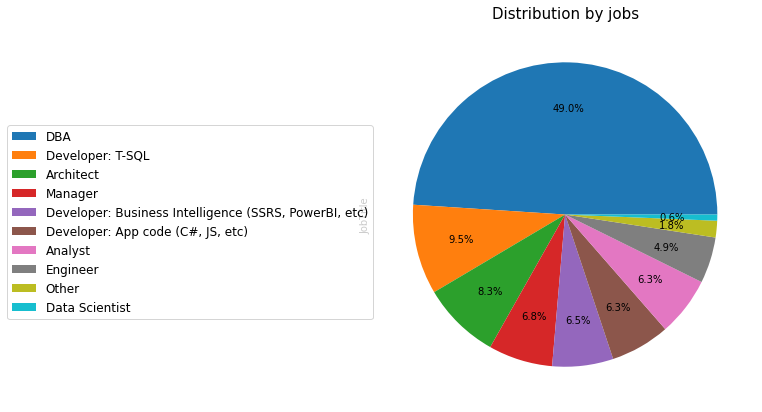

In [148]:
labels = survey_table['JobTitle'].value_counts().index
number_by_jobtitle.plot.pie(autopct="%1.1f%%", pctdistance=0.7, figsize=(7,7), labels=None)
plt.title("Distribution by jobs", fontsize=15)
plt.legend(labels, bbox_to_anchor=(0.01, 0.75),
           fontsize=12)

On constate que le DBA (DataBase Administrator) représente près de 50% des personnes sondées aux Etats-Unis. Quant aux autres professions, elles se tiennent toutes en-dessous de 10%. Parmi elles, le Data Scientist représente moins de 1% des sondés.

## Est-il préférable de travailler pour une seule ou plusieurs entreprises ?

Calculons la moyenne des salaires en fonction du nombre d'entreprises pour lesquelles ces personnes travaillent

In [149]:
companies_by_number = round(survey_table.groupby(['HowManyCompanies']).SalaryUSD.mean())
print(companies_by_number)

HowManyCompanies
1 (this is the only company where I've had this kind of position)     101478.0
2 (I worked at another similar position elsewhere before this one)    106938.0
3                                                                     119140.0
4                                                                     121474.0
5                                                                     121496.0
6 or more                                                             141073.0
Not Asked                                                             107783.0
Name: SalaryUSD, dtype: float64


In [150]:
# Transformation de Howmanycompanies en float
survey_table["HowManyCompanies"] = survey_table["HowManyCompanies"].apply(lambda x: str(x)[0])
survey_table.loc[(survey_table["HowManyCompanies"] == "N"), "HowManyCompanies"] = None
survey_table['HowManyCompanies'] = survey_table['HowManyCompanies'].astype("float")

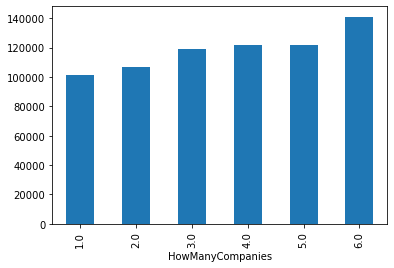

In [151]:
companies_by_number = survey_table.groupby(['HowManyCompanies']).SalaryUSD.mean()
companies_by_number.plot(kind='bar')
plt.show()

En observant l'histogramme, on constate que les écarts se creusent à partir d'une entreprise. Pour les personnes collaborant avec 5 entreprises ou plus, le salaire semble être le plus intéressant. Il vaut donc mieux avoir plusieurs cordes à son arc.

## Le nombre de personnes dans son équipe a-t-il une influence sur votre salaire ?

In [152]:
salary_by_team_member = survey_table.groupby(['OtherPeopleOnYourTeam']).SalaryUSD.mean()
print(salary_by_team_member)

OtherPeopleOnYourTeam
1              106692.106924
2              102605.602219
3              110152.734151
4              108819.326019
5              105579.922705
More than 5    109847.921960
None           111321.133516
Name: SalaryUSD, dtype: float64


<AxesSubplot:ylabel='SalaryUSD'>

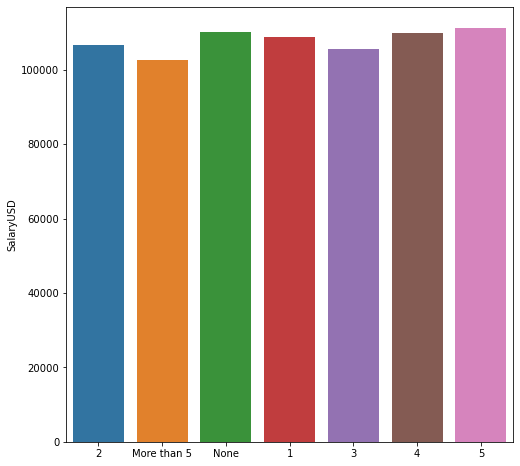

In [153]:
pie, ax = plt.subplots(figsize=[8,8])
sns.barplot(data=survey_table, x=survey_table['OtherPeopleOnYourTeam'].unique(), y=salary_by_team_member)

On observe que les écarts ne sont pas si significatifs que ça. Que l'on soit seul ou accompagné de plusieurs collègues, le salaire ne semble pas trop changer.

## Le nombre d'années d'expérience dans ce type d'emploi a-t-il une influence sur votre salaire?

In [154]:
survey_table['YearsWithThisTypeOfJob'].unique()

array([ 5,  6,  3, 25,  2,  4,  1, 10,  9, 15,  0,  7, 11, 20,  8, 22, 13,
       12, 21, 18, 14, 17, 16, 19, 23, 30, 28, 44, 26, 35, 40, 45, 24, 37,
       38, 32, 31, 29, 34, 27, 39, 36, 33])

<AxesSubplot:xlabel='YearsWithThisTypeOfJob', ylabel='SalaryUSD'>

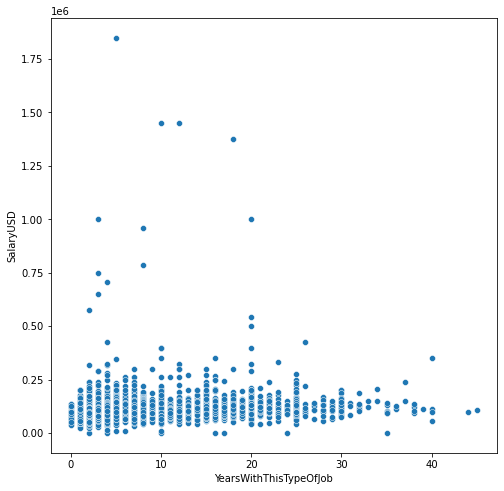

In [155]:
pie, ax = plt.subplots(figsize=[8,8])
sns.scatterplot(x=survey_table['YearsWithThisTypeOfJob'], y=survey_table['SalaryUSD'])

Sur ce nuage de points, on constate que le nombre d'années d'expérience n'a pas de réelle influence sur le salaire. Pendant la première partie de la carrière, on voit des écarts de salaire pour une même année. On peut supposer que ces écarts peuvent être dûs à la nature de la profession.